<a href="https://colab.research.google.com/github/project-ccap/project-ccap.github.io/blob/master/2021cnps/notebooks/2021_0812cnps_tlpa_tSNE_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 年 7 月版 tSNE を用いた tlpa 刺激語の描画
(was 2021年8月版 tSNE を用いた tlpa 刺激語の plot)

- update: 2023_0703
- date: 2021_0812
- filename: 2021_0812cnps_tSNE_demo.pynb
- author: 浅川伸一
- 概要: TLPA 200 語について tSNE の布置を描画

- tSNE については [原著論文](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) を参照のこと
- tSNE の使い方については javascript によるデモ [効率よく t-SNE を使う方法](https://project-ccap.github.io/misread-tsne/index.html) も参照してください。

In [19]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
try:
    import japanize_matplotlib
except ImportError:
    !pip install japanize_matplotlib
    import japanize_matplotlib

In [ ]:
#訓練済 word2vec ファイルの取得 通信環境によっては時間がかかります
#!wget --no-check-certificate --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1B9HGhLZOja4Xku5c_d-kMhCXn1LBZgDb' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1B9HGhLZOja4Xku5c_d-kMhCXn1LBZgDb" -O 2021_05jawiki_hid128_win10_neg10_cbow.bin.gz && rm -rf /tmp/cookies.txt
#!wget --no-check-certificate --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OWmFOVRC6amCxsomcRwdA6ILAA5s4y4M' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1OWmFOVRC6amCxsomcRwdA6ILAA5s4y4M" -O 2021_05jawiki_hid128_win10_neg10_sgns.bin.gz && rm -rf /tmp/cookies.txt
!wget --no-check-certificate --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JTkU5SUBU2GkURCYeHkAWYs_Zlbqob0s' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1JTkU5SUBU2GkURCYeHkAWYs_Zlbqob0s" -O 2021_05jawiki_hid200_win20_neg20_cbow.bin.gz && rm -rf /tmp/cookies.txt
#!wget --no-check-certificate --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1VPL2Mr9JgWHik9HjRmcADoxXIdrQ3ds7' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1VPL2Mr9JgWHik9HjRmcADoxXIdrQ3ds7" -O 2021_05jawiki_hid200_win20_neg20_sgns.bin.gz && rm -rf /tmp/cookies.txt

In [ ]:
%time
#直上のセルで取得したファイルの読み込み
import numpy as np
import os
import sys

# word2vec データ処理のため gensim を使う
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

# word2vec データの読み込み
# 訓練済 word2vec，訓練データは wikipedia 全文  読み込みに時間がかかります...
w2v_base = '.'  # ファイルの所在に応じて変更してください
#w2v_file='2021_05jawiki_hid128_win10_neg10_cbow.bin.gz'
#w2v_file='2021_05jawiki_hid128_win10_neg10_sgns.bin.gz'
w2v_file='2021_05jawiki_hid200_win20_neg20_cbow.bin.gz'
#w2v_file='2021_05jawiki_hid200_win20_neg20_sgns.bin.gz'
w2v_file = os.path.join(w2v_base, w2v_file)
w2v = KeyedVectors.load_word2vec_format(w2v_file,
                                        encoding='utf-8',
                                        unicode_errors='replace',
                                        binary=True)


In [18]:
# TLPA のデータ
tlpa_labels = ['バス', '緑', '桜', 'のり巻き', '五重塔', 'コップ', 'ごぼう', '土踏まず', '風呂', 'ヒトデ', 'ハム', '兎', 'ロープウエイ', '学校', 'ちりとり', '縁側', '歯', 'ネギ', 'あじさい', '灰色', '天井', '鍵', '肌色', 'ワニ', '電車', '顔', '松', 'ガードレール', '柿', 'ちまき', '信号', 'すすき', 'じょうろ', 'コンセント', '天ぷら', '中指', 'ヨット', 'ピンク', 'ふくろう', 'みかん', '柱', '角砂糖', '犬', 'かご', 'バラ', '鍋', 'まぶた', 'くるみ', '黒', 'デパート', 'カーネーション', '城', '蟻', '豆腐', 'ドライバー', '紺', '階段', '戦車', '人参', '背中', '鏡餅', 'スプーン', '朝顔', '金', '足', 'ふすま', '蛇', 'レモン', '公園', '乳母車', '床', '藤', 'ピンセット', 'トラック', '苺', '黄土色', '銭湯', 'ナマズ', 'そば', 'お腹', 'オレンジ', 'バター', '工場', '鳩', '電卓', '喉仏', 'チューリップ', '白菜', 'トラクター', '廊下', 'パトカー', '押入れ', '鉛筆', '目尻', '芋', '吊り橋', '赤', 'かき氷', '豹', 'サボテン', 'ピラミッド', 'サイ', '目', 'ひまわり', 'はたき', '刺し身', '玄関', 'トマト', '黄緑', '三輪車', '鶏', 'つむじ', 'アスパラガス', 'ドア', '銀色', 'すりこ木', 'ウイスキー', '梅', 'タクシー', '動物園', '床の間', '焦げ茶', 'ぶどう', '飴', '毛虫', 'アイロン', '寺', 'そり', 'ひょうたん', '首', '消しゴム', '頬', 'いちょう', '駅', 'ギョウザ', '牛', 'びわ', '飛行機', '畳', '白', '竹', 'ペリカン', '紫', '手すり', '口', '大根', '風車', '鋏', '潜水艦', 'ステーキ', 'マッチ', '二階', '落花生', '御飯', '自転車', '歩道橋', '鯨', '茶色', '菖蒲', 'ふくらはぎ', '桃', '鯛焼き', '道路', '靴べら', '水色', '壁', 'たんぽぽ', 'いかだ', '山羊', '鼻', '海老', '台所', 'オートバイ', 'かぶ', '柳', 'しゃもじ', 'まんじゅう', 'かかと', '薄紫', '家', 'おせち料理', '青', '傘', 'つくし', 'りんご', '馬車', '線路', 'タツノオトシゴ', '耳', '便所', '蓮根', '猫', '黄色', 'へそ', '街灯', '障子', '酒', '船', '安全ピン', 'もみじ']
tlpa_fam = ['高', '高', '高', '低', '低', '高', '低', '低', '高', '低', '高', '高', '低', '高', '低', '低', '高', '高', '低', '低', '高', '高', '低', '低', '高', '高', '高', '低', '低', '低', '高', '低', '低', '低', '高', '低', '高', '高', '低', '高', '低', '低', '高', '低', '高', '高', '低', '低', '高', '高', '低', '低', '高', '高', '低', '低', '高', '低', '高', '高', '低', '高', '高', '低', '高', '低', '高', '低', '高', '低', '高', '低', '低', '高', '高', '低', '低', '低', '高', '高', '高', '高', '高', '高', '低', '低', '高', '低', '低', '低', '高', '高', '高', '低', '高', '低', '高', '低', '低', '低', '低', '低', '高', '高', '低', '高', '高', '高', '低', '低', '高', '低', '低', '高', '低', '低', '低', '高', '高', '高', '低', '低', '高', '高', '低', '高', '高', '低', '低', '高', '高', '低', '低', '高', '低', '高', '低', '高', '低', '高', '高', '低', '高', '低', '高', '高', '低', '高', '低', '低', '高', '低', '低', '高', '高', '低', '高', '高', '低', '低', '高', '低', '高', '低', '低', '高', '高', '低', '低', '高', '高', '高', '高', '低', '低', '低', '高', '低', '低', '高', '低', '高', '高', '低', '高', '低', '低', '低', '高', '高', '低', '高', '高', '低', '低', '低', '高', '高', '低', '高']
tlpa_cat = ['乗り物', '色', '植物', '加工食品', '建造物', '道具', '野菜果物', '身体部位', '屋内部位', '動物', '加工食品', '動物', '乗り物', '建造物', '道具', '屋内部位', '身体部位', '野菜果物', '植物', '色', '屋内部位', '道具', '色', '動物', '乗り物', '身体部位', '植物', '建造物', '野菜果物', '加工食品', '建造物', '植物', '道具', '屋内部位', '加工食品', '身体部位', '乗り物', '色', '動物', '野菜果物', '屋内部位', '加工食品', '動物', '乗り物', '植物', '道具', '身体部位', '野菜果物', '色', '建造物', '植物', '建造物', '動物', '加工食品', '道具', '色', '屋内部位', '乗り物', '野菜果物', '身体部位', '加工食品', '道具', '植物', '色', '身体部位', '屋内部位', '動物', '野菜果物', '建造物', '乗り物', '屋内部位', '植物', '道具', '乗り物', '野菜果物', '色', '建造物', '動物', '加工食品', '身体部位', '色', '加工食品', '建造物', '動物', '道具', '身体部位', '植物', '野菜果物', '乗り物', '屋内部位', '乗り物', '屋内部位', '道具', '身体部位', '野菜果物', '建造物', '色', '加工食品', '動物', '植物', '建造物', '動物', '身体部位', '植物', '道具', '加工食品', '屋内部位', '野菜果物', '色', '乗り物', '動物', '身体部位', '野菜果物', '屋内部位', '色', '道具', '加工食品', '植物', '乗り物', '建造物', '屋内部位', '色', '野菜果物', '加工食品', '動物', '道具', '建造物', '乗り物', '植物', '身体部位', '道具', '身体部位', '植物', '建造物', '加工食品', '動物', '野菜果物', '乗り物', '屋内部位', '色', '植物', '動物', '色', '屋内部位', '身体部位', '野菜果物', '建造物', '道具', '乗り物', '加工食品', '道具', '屋内部位', '野菜果物', '加工食品', '乗り物', '建造物', '動物', '色', '植物', '身体部位', '野菜果物', '加工食品', '建造物', '道具', '色', '屋内部位', '植物', '乗り物', '動物', '身体部位', '動物', '屋内部位', '乗り物', '野菜果物', '植物', '道具', '加工食品', '身体部位', '色', '建造物', '加工食品', '色', '道具', '植物', '野菜果物', '乗り物', '建造物', '動物', '身体部位', '屋内部位', '野菜果物', '動物', '色', '身体部位', '建造物', '屋内部位', '加工食品', '乗り物', '道具', '植物']

X = np.array([w2v[word] for word in tlpa_labels], dtype=np.float)

<ipython-input-18-e3df102dd9e0>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array([w2v[word] for word in tlpa_labels], dtype=np.float)


In [5]:

import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(X)

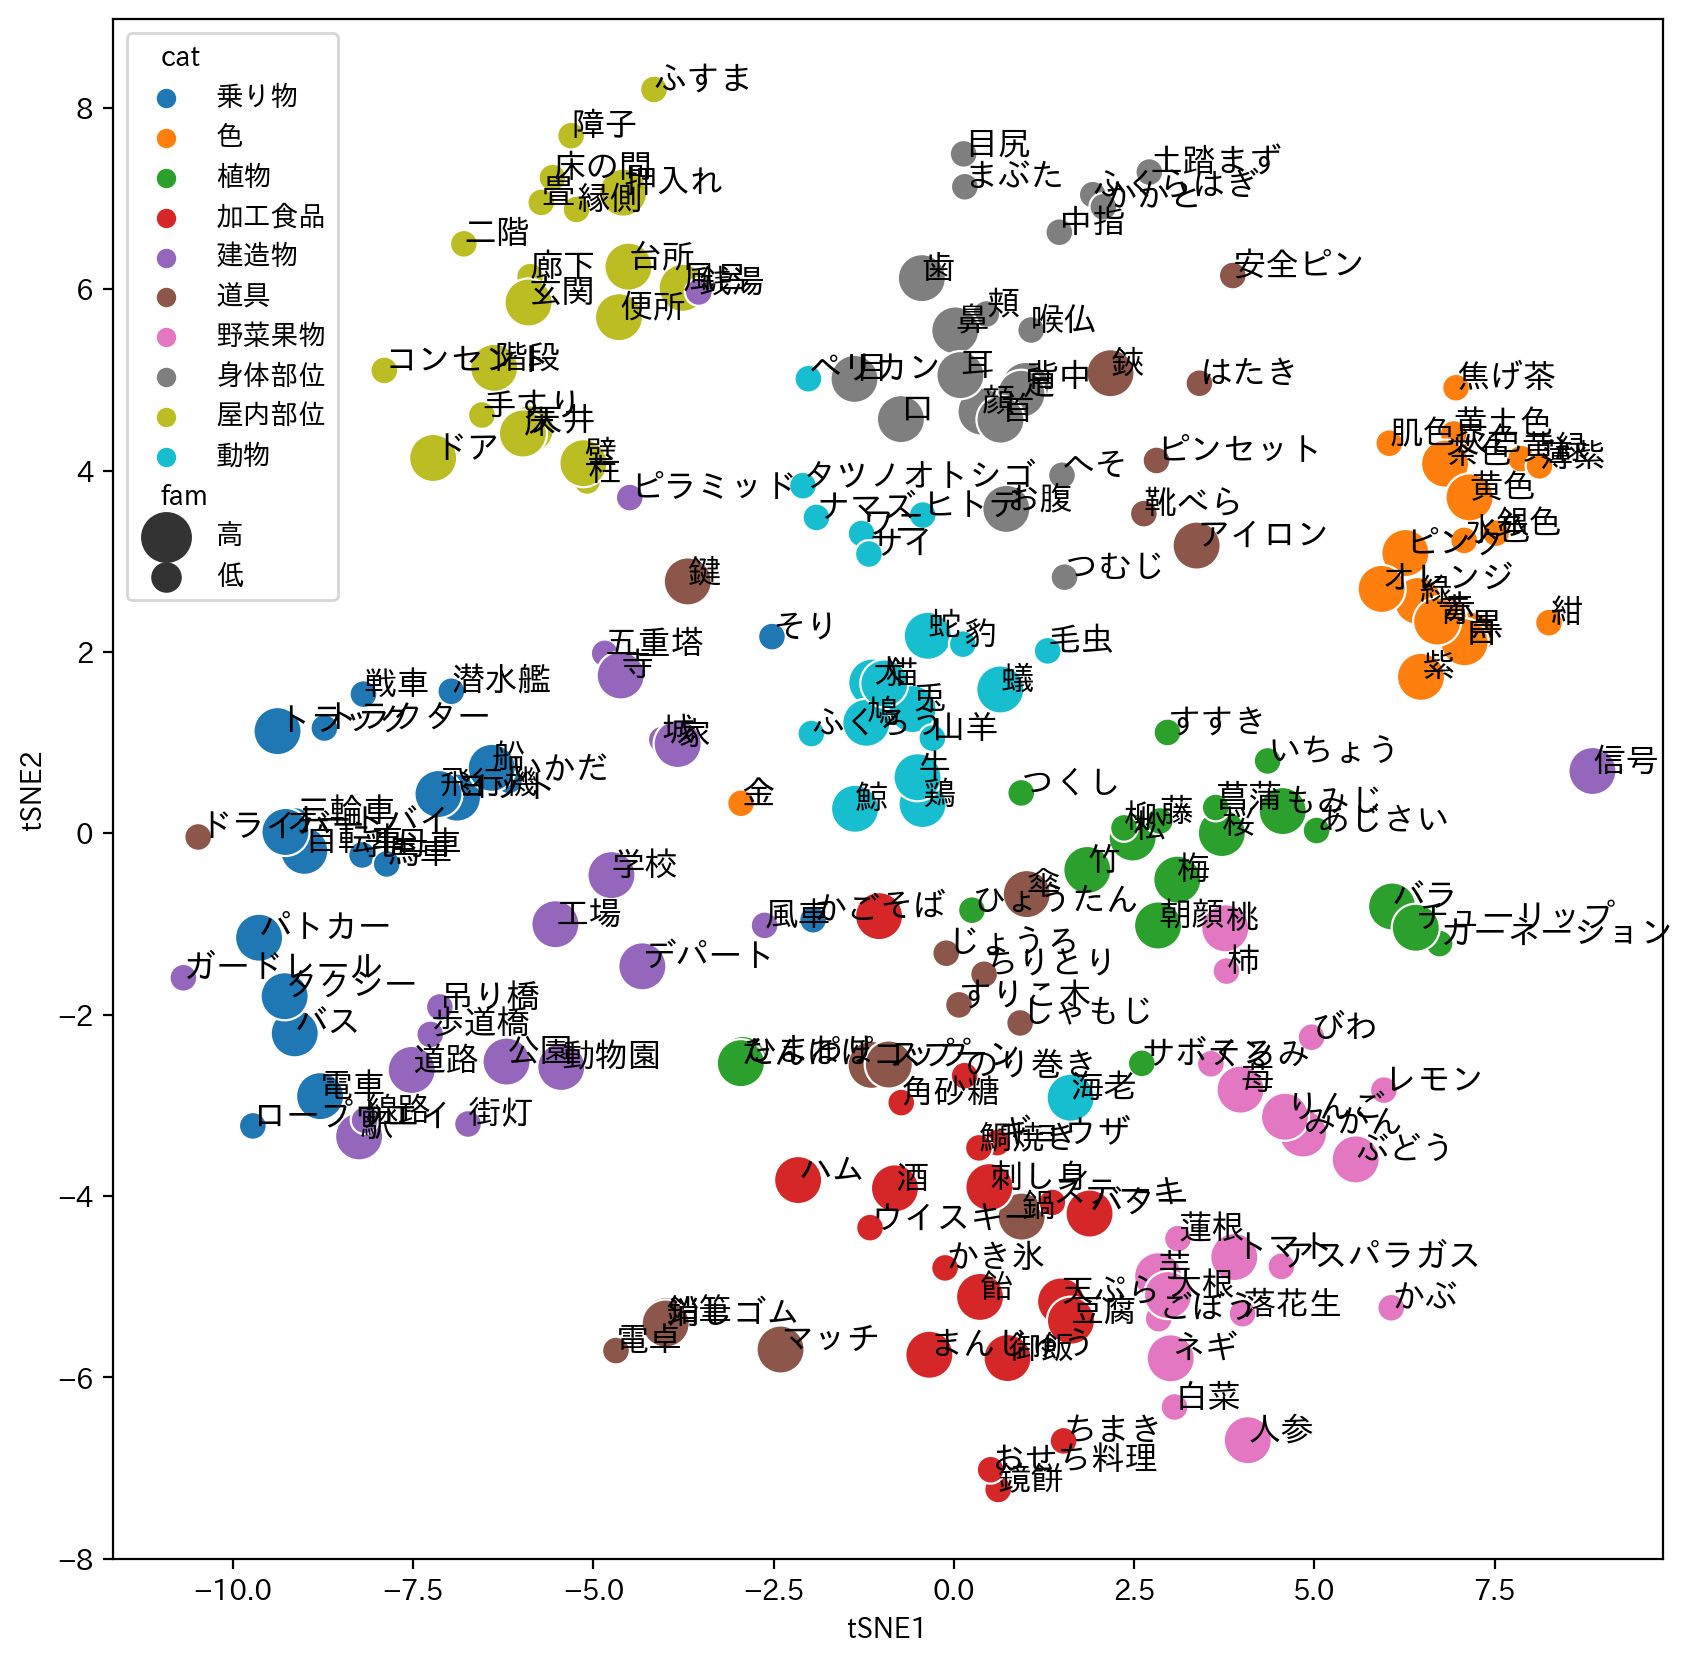

In [36]:
df = pd.DataFrame(tsne_results, columns=["tSNE1", "tSNE2"])
df["fam"] = tlpa_fam
df["cat"] = tlpa_cat
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="tSNE1", y="tSNE2", data=df, hue="cat", size="fam", sizes=(100,300)) # , legend="full")
for i, label in enumerate(tlpa_labels):
    ax.annotate(label, (df['tSNE1'][i], df['tSNE2'][i]), fontsize=12)

#T:乗り物, C:色, P:植物, F:加工食品, E:建造物, D:道具, V:野菜果物，B:身体部位, I:屋内部位, A:動物

In [34]:
df

,tSNE1,tSNE2,fam,cat
0,-9.143251,-2.204675,高,乗り物
1,6.435944,2.563235,高,色
2,3.715194,0.004345,高,植物
3,0.148272,-2.671759,低,加工食品
4,-4.843612,1.986161,低,建造物
...,...,...,...,...
195,-5.310202,7.694928,低,屋内部位
196,-0.818172,-3.914127,高,加工食品
197,-6.410469,0.723624,高,乗り物
198,3.867366,6.153074,低,道具


In [ ]:
# 結果をローカルドライブに保存する場合には以下を実行
from google.colab import files

fig_name = 'tlpa_tsne_plot.pdf'
fig = ax.get_figure()
fig.savefig(fig_name)
files.download(fig_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>